# Keras TF 2.0 - Code Along Classification Project


## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('white')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the data
df = pd.read_csv('../DATA/cancer_classification.csv')

## Exploratory Data Analysis

In [4]:
# info call
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
# describe call
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


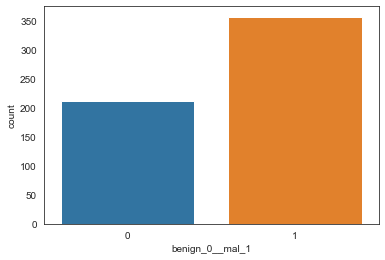

In [6]:
# check if our classes are balanced
sns.countplot(df['benign_0__mal_1'])

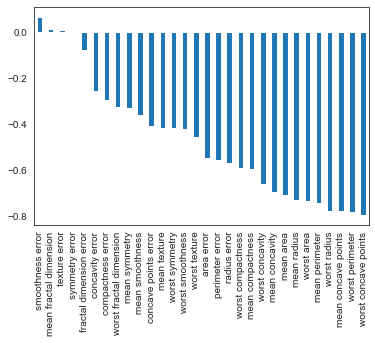

In [12]:
# check the features that are most correlated with the target variable
df.corr()['benign_0__mal_1'][:-1].sort_values(ascending=False).plot(kind='bar')

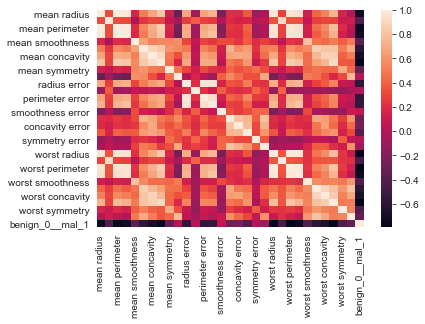

In [13]:
sns.heatmap(df.corr())

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# create our data sets
x = df.drop('benign_0__mal_1', axis = 1).values

y = df['benign_0__mal_1'].values

In [55]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 101)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
# create a scaler object
scaler = MinMaxScaler()

In [57]:
# scale our data
x_train = scaler.fit_transform(x_train)

x_test = scaler.fit_transform(x_test)

## Create the model

In [23]:
x_train.shape

(398, 30)

In [22]:
# importing our NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
# create our model
model = Sequential()

model.add(Dense(30, activation='relu')) # input layer

model.add(Dense(15, activation='relu')) # hidden layer

model.add(Dense(1, activation='sigmoid')) # output layer with sigmoid activation (0 or 1)

model.compile(loss='binary_crossentropy', optimizer = 'adam')

In [27]:
# train our model
model.fit(x = x_train, y = y_train, epochs=600,
         validation_data=(x_test, y_test))

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 0s 1ms/sample - loss: 0.6545 - val_loss: 0.6383
Epoch 2/600
398/398 [==============================] - 0s 117us/sample - loss: 0.6186 - val_loss: 0.5958
Epoch 3/600
398/398 [==============================] - 0s 133us/sample - loss: 0.5796 - val_loss: 0.5544
Epoch 4/600
398/398 [==============================] - 0s 124us/sample - loss: 0.5401 - val_loss: 0.5156
Epoch 5/600
398/398 [==============================] - 0s 166us/sample - loss: 0.4997 - val_loss: 0.4751
Epoch 6/600
398/398 [==============================] - 0s 144us/sample - loss: 0.4599 - val_loss: 0.4431
Epoch 7/600
398/398 [==============================] - 0s 173us/sample - loss: 0.4227 - val_loss: 0.4064
Epoch 8/600
398/398 [==============================] - 0s 128us/sample - loss: 0.3867 - val_loss: 0.3806
Epoch 9/600
398/398 [==============================] - 0s 225us/sample - loss: 0.3555 - val_loss: 0.3475
Epoch 10/60

398/398 [==============================] - 0s 97us/sample - loss: 0.0429 - val_loss: 0.3151
Epoch 78/600
398/398 [==============================] - 0s 161us/sample - loss: 0.0426 - val_loss: 0.3273
Epoch 79/600
398/398 [==============================] - ETA: 0s - loss: 0.053 - 0s 102us/sample - loss: 0.0436 - val_loss: 0.3523
Epoch 80/600
398/398 [==============================] - 0s 122us/sample - loss: 0.0423 - val_loss: 0.3243
Epoch 81/600
398/398 [==============================] - 0s 122us/sample - loss: 0.0465 - val_loss: 0.3331
Epoch 82/600
398/398 [==============================] - 0s 104us/sample - loss: 0.0423 - val_loss: 0.3655
Epoch 83/600
398/398 [==============================] - 0s 104us/sample - loss: 0.0443 - val_loss: 0.3149
Epoch 84/600
398/398 [==============================] - 0s 107us/sample - loss: 0.0421 - val_loss: 0.3767
Epoch 85/600
398/398 [==============================] - 0s 119us/sample - loss: 0.0414 - val_loss: 0.3164
Epoch 86/600
398/398 [==============

398/398 [==============================] - 0s 185us/sample - loss: 0.0310 - val_loss: 0.5038
Epoch 154/600
398/398 [==============================] - 0s 121us/sample - loss: 0.0309 - val_loss: 0.4300
Epoch 155/600
398/398 [==============================] - 0s 121us/sample - loss: 0.0304 - val_loss: 0.4650
Epoch 156/600
398/398 [==============================] - 0s 126us/sample - loss: 0.0303 - val_loss: 0.4741
Epoch 157/600
398/398 [==============================] - 0s 106us/sample - loss: 0.0307 - val_loss: 0.4934
Epoch 158/600
398/398 [==============================] - 0s 110us/sample - loss: 0.0292 - val_loss: 0.4524
Epoch 159/600
398/398 [==============================] - 0s 117us/sample - loss: 0.0300 - val_loss: 0.5050
Epoch 160/600
398/398 [==============================] - 0s 120us/sample - loss: 0.0287 - val_loss: 0.4796
Epoch 161/600
398/398 [==============================] - 0s 121us/sample - loss: 0.0299 - val_loss: 0.4807
Epoch 162/600
398/398 [============================

398/398 [==============================] - 0s 132us/sample - loss: 0.0242 - val_loss: 0.6037
Epoch 230/600
398/398 [==============================] - 0s 153us/sample - loss: 0.0238 - val_loss: 0.6238
Epoch 231/600
398/398 [==============================] - 0s 149us/sample - loss: 0.0252 - val_loss: 0.6177
Epoch 232/600
398/398 [==============================] - 0s 121us/sample - loss: 0.0237 - val_loss: 0.5799
Epoch 233/600
398/398 [==============================] - 0s 130us/sample - loss: 0.0263 - val_loss: 0.6016
Epoch 234/600
398/398 [==============================] - 0s 151us/sample - loss: 0.0235 - val_loss: 0.6106
Epoch 235/600
398/398 [==============================] - 0s 134us/sample - loss: 0.0223 - val_loss: 0.6754
Epoch 236/600
398/398 [==============================] - 0s 144us/sample - loss: 0.0224 - val_loss: 0.5809
Epoch 237/600
398/398 [==============================] - 0s 105us/sample - loss: 0.0266 - val_loss: 0.6967
Epoch 238/600
398/398 [============================

398/398 [==============================] - 0s 166us/sample - loss: 0.0173 - val_loss: 0.7343
Epoch 306/600
398/398 [==============================] - 0s 148us/sample - loss: 0.0171 - val_loss: 0.7846
Epoch 307/600
398/398 [==============================] - 0s 123us/sample - loss: 0.0197 - val_loss: 0.7075
Epoch 308/600
398/398 [==============================] - 0s 137us/sample - loss: 0.0208 - val_loss: 0.9290
Epoch 309/600
398/398 [==============================] - 0s 159us/sample - loss: 0.0201 - val_loss: 0.7796
Epoch 310/600
398/398 [==============================] - 0s 167us/sample - loss: 0.0212 - val_loss: 0.7183
Epoch 311/600
398/398 [==============================] - 0s 126us/sample - loss: 0.0164 - val_loss: 0.8698
Epoch 312/600
398/398 [==============================] - 0s 161us/sample - loss: 0.0163 - val_loss: 0.7346
Epoch 313/600
398/398 [==============================] - 0s 153us/sample - loss: 0.0172 - val_loss: 0.7964
Epoch 314/600
398/398 [============================

398/398 [==============================] - 0s 141us/sample - loss: 0.0127 - val_loss: 0.9079
Epoch 382/600
398/398 [==============================] - 0s 153us/sample - loss: 0.0130 - val_loss: 1.0023
Epoch 383/600
398/398 [==============================] - 0s 195us/sample - loss: 0.0146 - val_loss: 0.9069
Epoch 384/600
398/398 [==============================] - 0s 124us/sample - loss: 0.0177 - val_loss: 0.9836
Epoch 385/600
398/398 [==============================] - 0s 130us/sample - loss: 0.0133 - val_loss: 0.9491
Epoch 386/600
398/398 [==============================] - 0s 127us/sample - loss: 0.0138 - val_loss: 0.9801
Epoch 387/600
398/398 [==============================] - 0s 125us/sample - loss: 0.0135 - val_loss: 0.9976
Epoch 388/600
398/398 [==============================] - 0s 121us/sample - loss: 0.0134 - val_loss: 0.9732
Epoch 389/600
398/398 [==============================] - 0s 164us/sample - loss: 0.0138 - val_loss: 0.9579
Epoch 390/600
398/398 [============================

398/398 [==============================] - 0s 195us/sample - loss: 0.0093 - val_loss: 1.1228
Epoch 458/600
398/398 [==============================] - 0s 168us/sample - loss: 0.0091 - val_loss: 1.1806
Epoch 459/600
398/398 [==============================] - 0s 131us/sample - loss: 0.0097 - val_loss: 1.1722
Epoch 460/600
398/398 [==============================] - 0s 153us/sample - loss: 0.0123 - val_loss: 1.0989
Epoch 461/600
398/398 [==============================] - 0s 133us/sample - loss: 0.0111 - val_loss: 1.1710
Epoch 462/600
398/398 [==============================] - 0s 159us/sample - loss: 0.0102 - val_loss: 1.2254
Epoch 463/600
398/398 [==============================] - 0s 128us/sample - loss: 0.0175 - val_loss: 1.2044
Epoch 464/600
398/398 [==============================] - 0s 149us/sample - loss: 0.0130 - val_loss: 1.1341
Epoch 465/600
398/398 [==============================] - 0s 165us/sample - loss: 0.0135 - val_loss: 1.2472
Epoch 466/600
398/398 [============================

398/398 [==============================] - 0s 416us/sample - loss: 0.0062 - val_loss: 1.3046
Epoch 534/600
398/398 [==============================] - 0s 123us/sample - loss: 0.0065 - val_loss: 1.3375
Epoch 535/600
398/398 [==============================] - 0s 121us/sample - loss: 0.0079 - val_loss: 1.2991
Epoch 536/600
398/398 [==============================] - 0s 164us/sample - loss: 0.0100 - val_loss: 1.4963
Epoch 537/600
398/398 [==============================] - 0s 124us/sample - loss: 0.0105 - val_loss: 1.2840
Epoch 538/600
398/398 [==============================] - 0s 143us/sample - loss: 0.0067 - val_loss: 1.3951
Epoch 539/600
398/398 [==============================] - 0s 122us/sample - loss: 0.0071 - val_loss: 1.3370
Epoch 540/600
398/398 [==============================] - 0s 135us/sample - loss: 0.0068 - val_loss: 1.3950
Epoch 541/600
398/398 [==============================] - 0s 155us/sample - loss: 0.0062 - val_loss: 1.3292
Epoch 542/600
398/398 [============================

In [30]:
# save the model loss into a data frame
model_loss = pd.DataFrame(model.history.history)

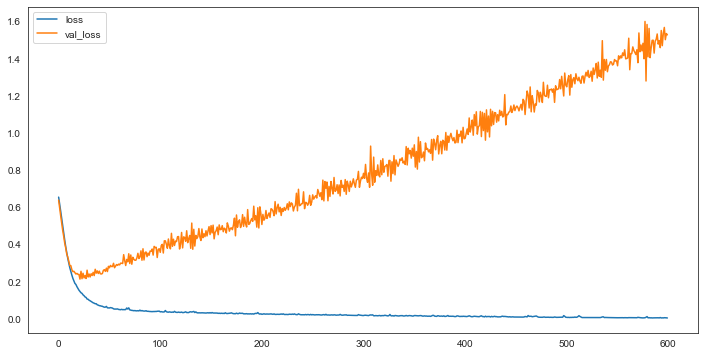

In [33]:
# plot the loss across the 600 epoches ---> OVERFITTING!
model_loss.plot(figsize = (12, 6))

In [42]:
# let's introduce early stopping into our model to avoid overfitting
model = Sequential()

model.add(Dense(30, activation='relu')) # input layer

model.add(Dense(15, activation='relu')) # hidden layer

model.add(Dense(1, activation='sigmoid')) # output layer with sigmoid activation (0 or 1)

model.compile(loss='binary_crossentropy', optimizer = 'adam')

In [35]:
# importing early stopping
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [43]:
# create our early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience=25) 

# we want to minimize the val_loss
# we will wait 25 ephocs without improving before stopping


In [44]:
# train our model
model.fit(x = x_train, y = y_train, epochs=600,
         validation_data=(x_test, y_test),
         callbacks=[early_stop]) # callback tells the model to stop when early stop criteria is met

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 0s 1ms/sample - loss: 0.6950 - val_loss: 0.6873
Epoch 2/600
398/398 [==============================] - 0s 152us/sample - loss: 0.6778 - val_loss: 0.6755
Epoch 3/600
398/398 [==============================] - 0s 115us/sample - loss: 0.6628 - val_loss: 0.6600
Epoch 4/600
398/398 [==============================] - 0s 132us/sample - loss: 0.6462 - val_loss: 0.6398
Epoch 5/600
398/398 [==============================] - 0s 156us/sample - loss: 0.6266 - val_loss: 0.6181
Epoch 6/600
398/398 [==============================] - 0s 130us/sample - loss: 0.6059 - val_loss: 0.5934
Epoch 7/600
398/398 [==============================] - 0s 166us/sample - loss: 0.5823 - val_loss: 0.5678
Epoch 8/600
398/398 [==============================] - 0s 143us/sample - loss: 0.5552 - val_loss: 0.5385
Epoch 9/600
398/398 [==============================] - 0s 197us/sample - loss: 0.5261 - val_loss: 0.5048
Epoch 10/60

In [45]:
model_loss = pd.DataFrame(model.history.history)

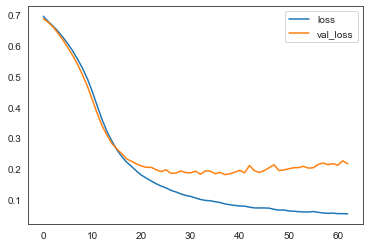

In [46]:
# plot the model's loss
model_loss.plot()

In [47]:
from tensorflow.keras.layers import Dropout

In [58]:
# create our model
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5)) # a neuron will be turned off with 50% probability - half of the neurons

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5)) # a neuron will be turned off with 50% probability - half of the neurons

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [59]:
# fit out model using the early stopping criteria alongside with callbaks
model.fit(x=x_train, 
          y=y_train, 
          epochs=600,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6863 - val_loss: 0.6774
Epoch 2/600
426/426 [==============================] - 0s 105us/sample - loss: 0.6841 - val_loss: 0.6627
Epoch 3/600
426/426 [==============================] - 0s 128us/sample - loss: 0.6582 - val_loss: 0.6532
Epoch 4/600
426/426 [==============================] - 0s 114us/sample - loss: 0.6496 - val_loss: 0.6371
Epoch 5/600
426/426 [==============================] - 0s 105us/sample - loss: 0.6335 - val_loss: 0.6153
Epoch 6/600
426/426 [==============================] - 0s 139us/sample - loss: 0.6042 - val_loss: 0.5887
Epoch 7/600
426/426 [==============================] - 0s 142us/sample - loss: 0.5900 - val_loss: 0.5617
Epoch 8/600
426/426 [==============================] - 0s 130us/sample - loss: 0.5836 - val_loss: 0.5347
Epoch 9/600
426/426 [==============================] - 0s 116us/sample - loss: 0.5603 - val_loss: 0.5097
Epoch 10/60

426/426 [==============================] - 0s 104us/sample - loss: 0.1095 - val_loss: 0.1420
Epoch 79/600
426/426 [==============================] - 0s 90us/sample - loss: 0.1280 - val_loss: 0.1595
Epoch 80/600
426/426 [==============================] - 0s 91us/sample - loss: 0.1462 - val_loss: 0.1371
Epoch 81/600
426/426 [==============================] - 0s 135us/sample - loss: 0.1240 - val_loss: 0.1269
Epoch 82/600
426/426 [==============================] - 0s 113us/sample - loss: 0.1044 - val_loss: 0.1647
Epoch 83/600
426/426 [==============================] - 0s 98us/sample - loss: 0.1233 - val_loss: 0.1615
Epoch 84/600
426/426 [==============================] - 0s 101us/sample - loss: 0.1321 - val_loss: 0.1387
Epoch 85/600
426/426 [==============================] - 0s 102us/sample - loss: 0.1188 - val_loss: 0.1407
Epoch 86/600
426/426 [==============================] - 0s 99us/sample - loss: 0.1211 - val_loss: 0.1682
Epoch 87/600
426/426 [==============================] - 0s 99us

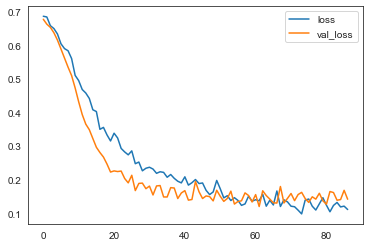

In [60]:
# plot the model loss - PERFECT!
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [61]:
# create new predictions
predictions = model.predict_classes(x_test)

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
# evaluate the model
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[54  1]
 [ 9 79]]


              precision    recall  f1-score   support

           0       0.86      0.98      0.92        55
           1       0.99      0.90      0.94        88

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.93      0.93       143

